# Concrete Strength Final Project
## Ramon Zubiate, Ramy Gerges, Roberto Cortez

### In this notebook, we present data analysis and programming capability using Python. 

Below is a link to the interface being hosted from a web server called Binder:

Link:

## Data Analysis with Models

Using the Concrete_Data database, we used various models and statistics methods to analyze the dataset. We gave details on our observations.

Our first step was to acquire the database and make preprocessing checks, such as:

1. Importing the libraries
2. Loading the dataframe into a variable
3. Changing the column names appropriately
4. Checking for missing values
5. Preliminarily check the data
6. Proceed to display models

In [55]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


concrete = pd.read_excel('concreteData.xls')

concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [56]:
#rename concrete dataframe to approppriate column names

old_concrete_df = concrete #store old here just in case

col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

new_col_names = list(concrete.columns)

mapper = {}

for i, name in enumerate(new_col_names):
    mapper[name] = col_names[i]

concrete = concrete.rename(columns=mapper)

concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [57]:
# Now we need to check for missing values

missing_values = concrete.isnull().sum()

missing_values_count = concrete.isnull().sum().sum()

print(missing_values)

print("\nThere are ", missing_values_count, " missing values in this dataset.")

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

There are  0  missing values in this dataset.


## Exploratory Data Analysis

(Put exploratory data analysis here)

                    Cement  BlastFurnaceSlag    FlyAsh     Water  \
Cement            1.000000         -0.275193 -0.397475 -0.081544   
BlastFurnaceSlag -0.275193          1.000000 -0.323569  0.107286   
FlyAsh           -0.397475         -0.323569  1.000000 -0.257044   
Water            -0.081544          0.107286 -0.257044  1.000000   
Superplasticizer  0.092771          0.043376  0.377340 -0.657464   
CoarseAggregate  -0.109356         -0.283998 -0.009977 -0.182312   
FineAggregate    -0.222720         -0.281593  0.079076 -0.450635   
Age               0.081947         -0.044246 -0.154370  0.277604   
CC_Strength       0.497833          0.134824 -0.105753 -0.289613   

                  Superplasticizer  CoarseAggregate  FineAggregate       Age  \
Cement                    0.092771        -0.109356      -0.222720  0.081947   
BlastFurnaceSlag          0.043376        -0.283998      -0.281593 -0.044246   
FlyAsh                    0.377340        -0.009977       0.079076 -0.154370   

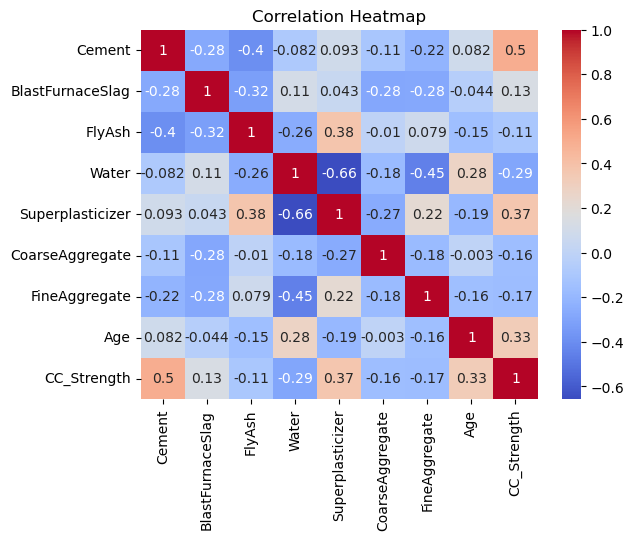

In [58]:
#some data representation w/ heatmap

corr = concrete.corr()
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title('Correlation Heatmap')

print(corr)

# Show plots
plt.show()

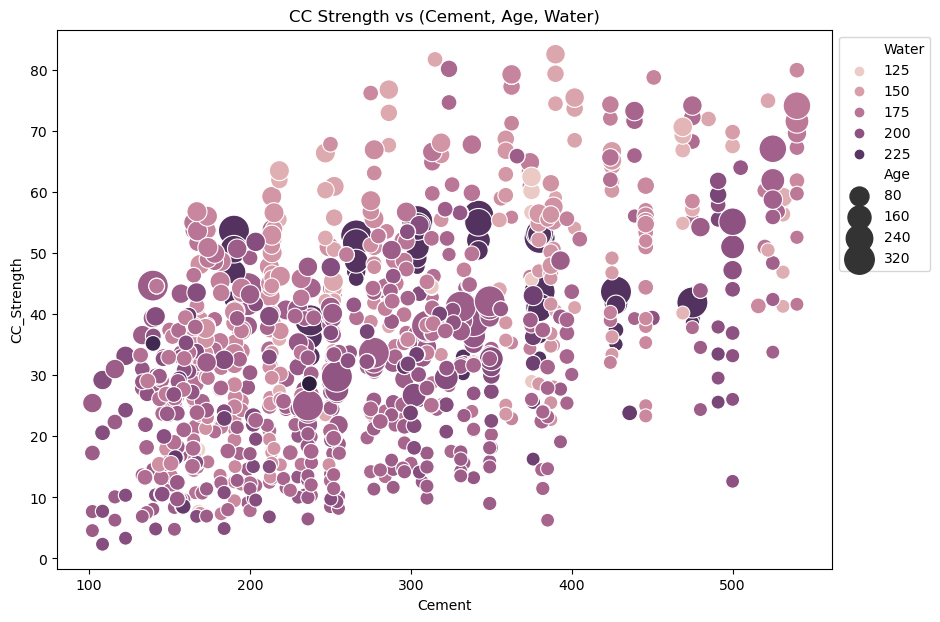

In [59]:
#Highly detailed scatter plot detailing CC Strength in correlation to cement, age, and water variables

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=concrete, ax=ax, sizes=(100, 500))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

C:\Users\ramon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


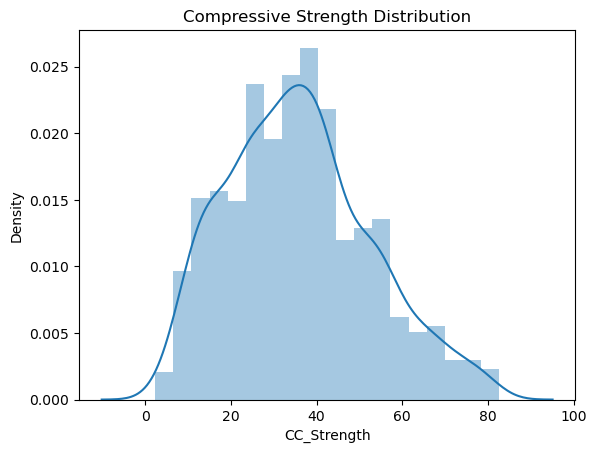

In [60]:
#Distance plot detailing concrete strength distribution

ax = sns.distplot(concrete["CC_Strength"])
ax.set_title("Compressive Strength Distribution")
plt.show()

## Observations

Looking at the heatmap, we can see that the values on the diagonal (top-left to bottom-right) are all 1.0. This is because these are the correlations of each variable with itself, which is always perfect. To analyze the correlation between variables, we can look at the values off the diagonal. The values range from -1.0 to 1.0, with negative values indicating a negative correlation (i.e. as one variable increases, the other decreases) and positive values indicating a positive correlation (i.e. as one variable increases, the other increases). For example, we can see that there is a strong positive correlation (0.497833) between "Cement" and "CC_Strength", meaning that as the amount of cement in the mixture increases, the compressive strength of the concrete tends to increase as well. On the other hand, there is a weak negative correlation (-0.081544) between "Cement" and "Water", meaning that as the amount of cement in the mixture increases, the amount of water tends to decrease slightly.

The scatter plot shows the relationship between the compressive strength of concrete and three other features: cement, water, and age. The size of each point on the plot represents the value of the "Superplasticizer" feature, while the color represents the value of the "FineAggregate" feature. From the plot, we can see that there is a positive correlation between compressive strength and cement, as well as a negative correlation between compressive strength and water. There also appears to be a weak positive correlation between compressive strength and age. The size of the points (which represents Superplasticizer) does not seem to have a strong relationship with compressive strength, although there is a slightly higher concentration of larger points (higher values of Superplasticizer) in the upper right corner of the plot where compressive strength is also higher. The color of the points (which represents FineAggregate) also does not seem to have a strong relationship with compressive strength, although there is a higher concentration of darker (higher values of FineAggregate) points in the lower left corner of the plot where compressive strength is lower.

Looking at the compressive strength distribution model, we can observe that the density affects the strength of the concrete. With a median of 40 MPa to 50 MPa, the density and cement seems to have a positive correlation until the density reaches a point of around .025 kg/m³.

## Model Building

Building the training model to predict the compressive strength values using primarily linear regression. We will also use decision tree regressor and random forests to help predict the MPa values.

In [81]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate target variable (y) and predictors (X)
y = concrete["CC_Strength"]
X = concrete.drop("CC_Strength", axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = np.mean((y_pred - y_test)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Mean squared error: 109.7561406373493
RMSE: 10.47645649240951


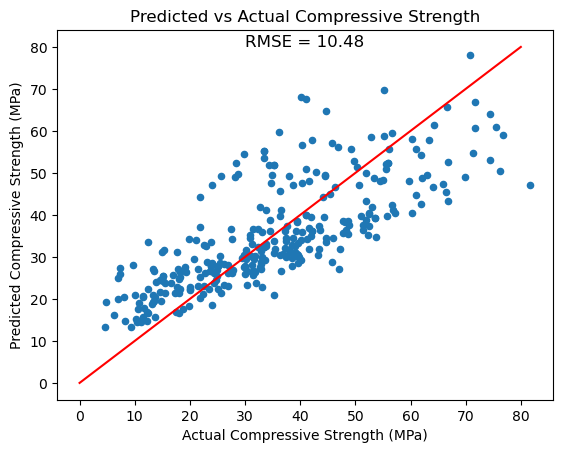

In [82]:
#Scatter plot

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_df.plot(x='Actual', y='Predicted', kind='scatter')
plt.title('Predicted vs Actual Compressive Strength')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')

# Plot the linear regression line
plt.plot([0, 80], [0, 80], color='red')
plt.text(30, 80, f"RMSE = {rmse:.2f}", fontsize=12)

plt.show()

In [83]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Define the features and target variables
X = concrete.drop('CC_Strength', axis=1)
y = concrete['CC_Strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Decision Tree Regressor class
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print("RMSE:", rmse)

RMSE: 6.522963164558177


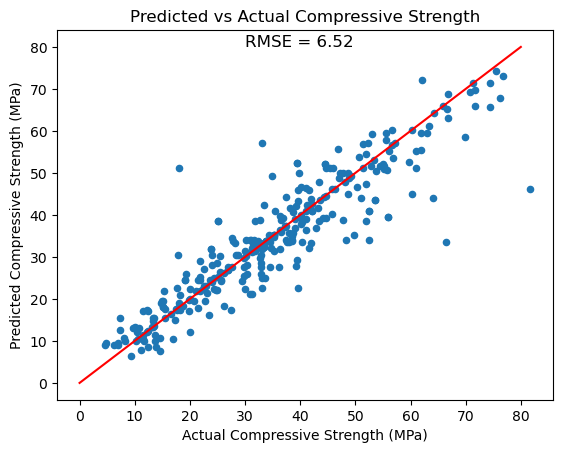

In [85]:
#Scatter plot

dt_result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dt_result_df.plot(x='Actual', y='Predicted', kind='scatter')
plt.title('Predicted vs Actual Compressive Strength')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')

# Plot the linear regression line
plt.plot([0, 80], [0, 80], color='red')
plt.text(30, 80, f"RMSE = {rmse:.2f}", fontsize=12)

plt.show()

In [88]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X = concrete.drop('CC_Strength', axis=1)
y = concrete['CC_Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)


Random Forest RMSE: 5.419245926725638


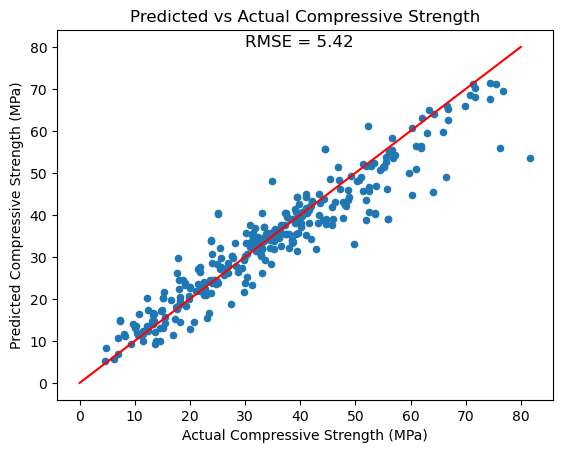

In [89]:
#Scatter plot

rf_result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

rf_result_df.plot(x='Actual', y='Predicted', kind='scatter')
plt.title('Predicted vs Actual Compressive Strength')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')

# Plot the linear regression line
plt.plot([0, 80], [0, 80], color='red')
plt.text(30, 80, f"RMSE = {rmse:.2f}", fontsize=12)

plt.show()

## Model Observations

Linear Regression: This model assumes that there is a linear relationship between the input variables and the output variable. It is a simple model and can be quick to train and make predictions. However, it may not be suitable if the data has complex relationships or nonlinear patterns.

Decision Tree Regressor: This model is a non-linear model that splits the data into smaller subsets based on the input features, using a decision tree. It is a powerful model that can capture complex relationships between the input and output variables. However, it may be prone to overfitting and can be sensitive to small changes in the data.

Random Forest Regressor: This model is an extension of the decision tree regressor that uses multiple decision trees and combines their predictions to make a final prediction. It can help reduce overfitting and improve the accuracy of predictions compared to a single decision tree. However, it can be computationally expensive and may not be necessary for simpler datasets.

Ultimately, the best model will depend on the specific characteristics of the dataset and the goals of the analysis. It's often a good idea to try multiple models and compare their performance to determine the best approach.

The RMSE values obtained from the three models can be used to compare their prediction accuracies. The lower the RMSE, the better the model is at making predictions. In this case, the Random Forest model has the lowest RMSE, followed by the Decision Tree model and then the Linear Regression model. This suggests that the Random Forest model may be the most accurate model for predicting concrete compressive strength based on the given features.